# Group Project

Completed By: 1. Abdullah (19-40521-1) 2. Sakib Hasan (19-40013-1)   

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from PIL import Image

In [2]:
# Training and test paths
test_path = 'asl_alphabet_test/asl_alphabet_test/'
train_path = 'asl_alphabet_train/asl_alphabet_train/'

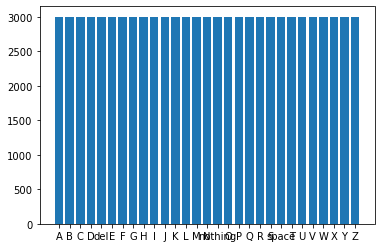

In [3]:
# Class imbalance identification
classes = os.listdir(train_path)
nos = []
for i in classes:
    nos.append(len(os.listdir(train_path + i)))
    
plt.bar(classes, nos)
plt.show()

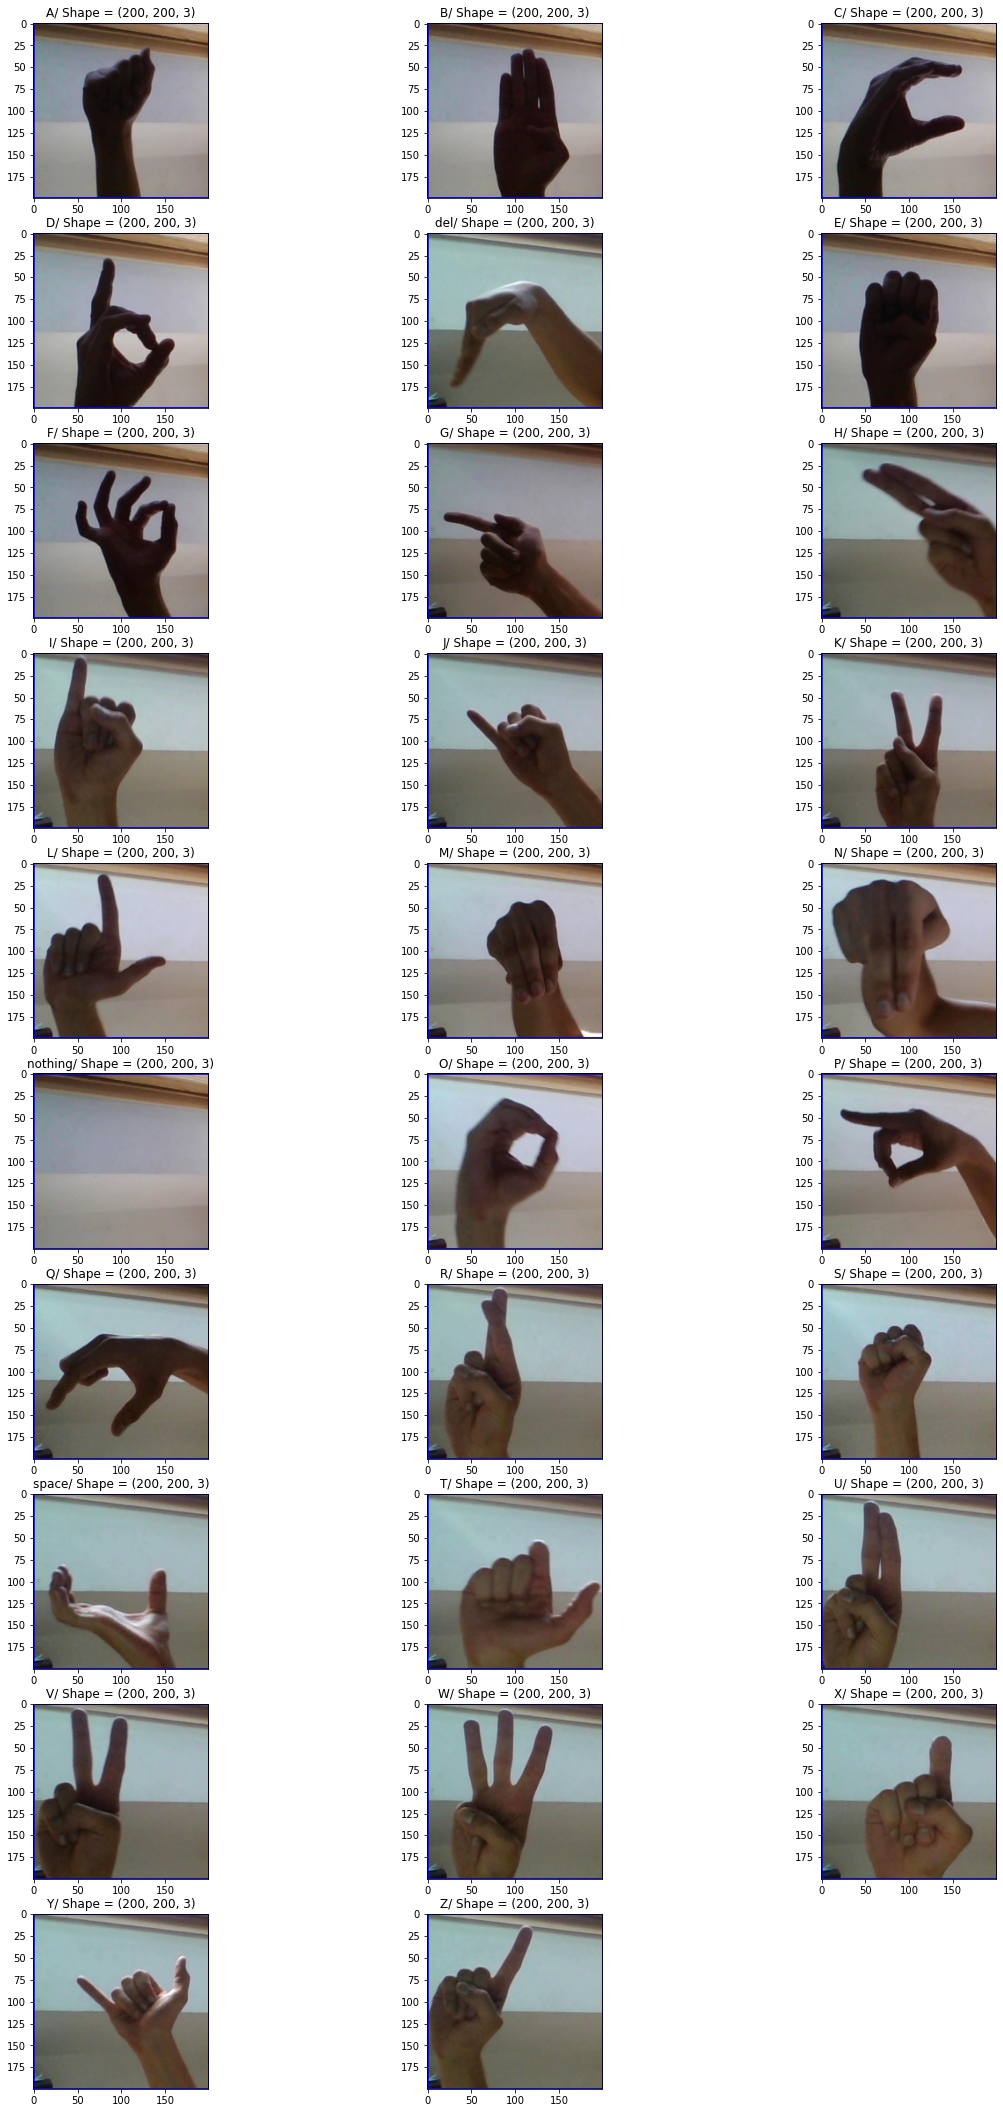

In [4]:
# Visualizations
plt.figure(figsize=(20,38))
for i in enumerate(classes):
    image = os.listdir(train_path+i[1])[0]
    image = Image.open(train_path+i[1]+'/'+image)
    image = np.asarray(image)
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    plt.title('{0}/ Shape = {1}'.format(i[1], image.shape))
plt.show()

In [5]:
# Creating train and validation sets

datagen = ImageDataGenerator(rescale=1/255, validation_split=0.3)

train = datagen.flow_from_directory(train_path, subset='training')
val = datagen.flow_from_directory(train_path, subset='validation')

Found 60900 images belonging to 29 classes.
Found 26100 images belonging to 29 classes.


In [6]:
# Defining the model

def get_model():
    base_model = InceptionResNetV2(include_top=False, input_shape=(200,200,3))
    
    for layer in base_model.layers[:150]:
        layer.trainable = False
    for layer in base_model.layers[150:]:
        layer.trainable = True
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1000, activation='relu')(x)
    pred = Dense(len(classes), activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=pred)
    
    return model

In [7]:
# Initiating the model
model = get_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
# Training and validating the model
model.fit(train, epochs=2, validation_data=val)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1904 steps, validate for 816 steps
Epoch 1/2
1904/1904 [==============================] - 1428s 750ms/step - loss: 0.1131 - accuracy: 0.9688 - val_loss: 0.2913 - val_accuracy: 0.9268
Epoch 2/2
1904/1904 [==============================] - 1433s 753ms/step - loss: 0.0244 - accuracy: 0.9936 - val_loss: 0.1461 - val_accuracy: 0.9613


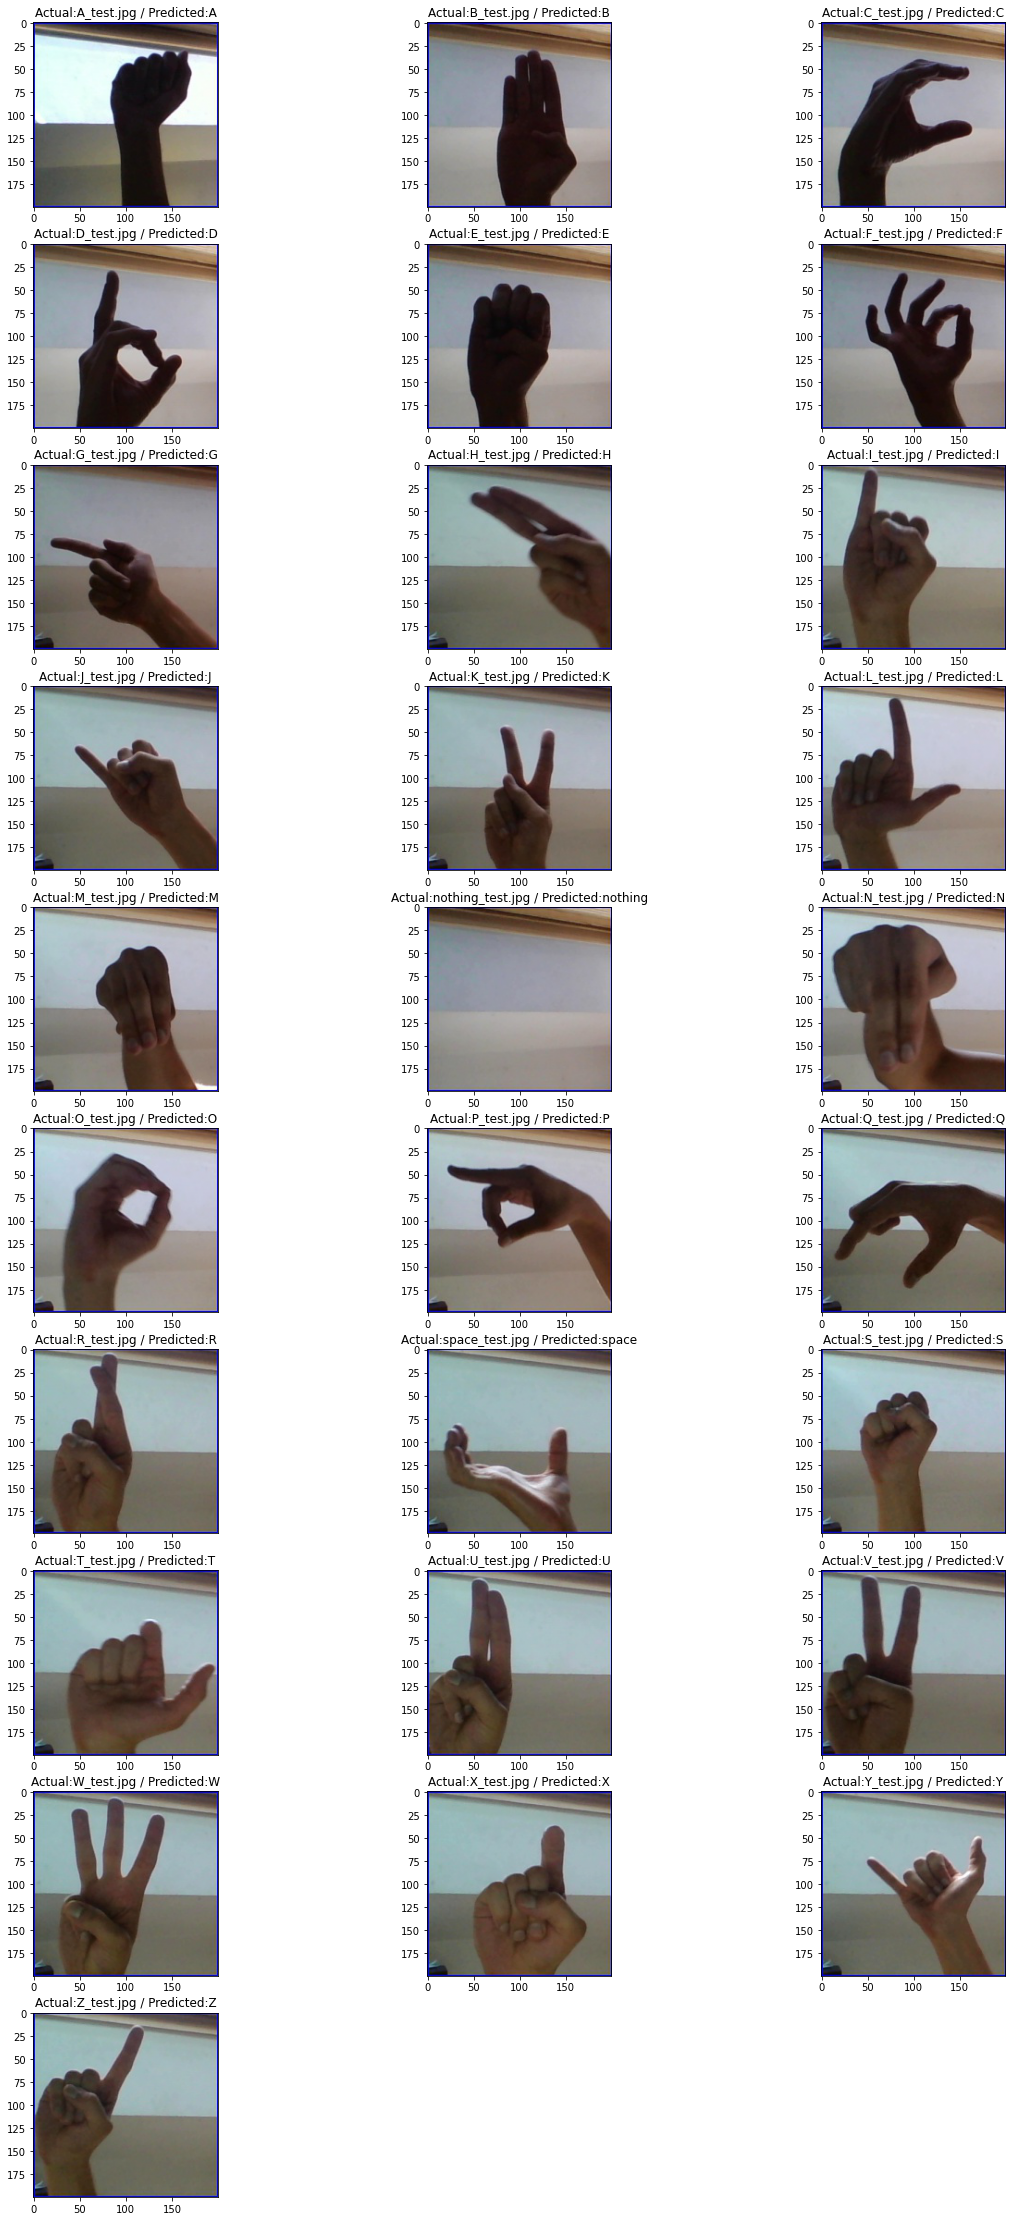

In [9]:
# Predictions
plt.figure(figsize=(20,40))
for i in enumerate(os.listdir(test_path)):
    image = Image.open(test_path+'/'+i[1])
    image = np.asarray(image)
    image = image/255
    
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    
    pred = np.argmax(model.predict(image.reshape(-1,200,200,3)))
    for j in train.class_indices:
        if pred == train.class_indices[j]:
            prediction=j
        else:
            continue
    
    plt.title('Actual:{0} / Predicted:{1}'.format(i[1],prediction))